> stock data analysis(plot the bias between the day and the next day)

- date to timestamp
> we need timestamp to sort and mantain the order

In [1]:
import time
from pyspark import SparkConf, SparkContext

dt = "2023-01-01"
timestamp = time.mktime(time.strptime(dt,"%Y-%m-%d"))
print(timestamp)

1672502400.0


- data preprocessing

In [4]:
data = sc.textFile("file:///home/jkx/stockdata/001979.csv")
header = data.first()
data = data.filter(lambda row : row != header)

In [5]:
data = data.map(
    lambda x : x.split(",")
).map(
    lambda x : (time.mktime(time.strptime(x[0], "%Y-%m-%d")), (x[0], float(x[2])))
)

for line in data.take(5):
    print(line)

(1382284800.0, ('2013-10-21', 0.0))
(1382371200.0, ('2013-10-22', 0.0))
(1382457600.0, ('2013-10-23', 0.0))
(1382544000.0, ('2013-10-24', 0.0))
(1382630400.0, ('2013-10-25', 0.0))


- remove the zeros & sort by timestamp

In [6]:
data = data.filter(
    lambda line : line[1][1] != 0
)

data = data.sortBy(
    lambda line : line[0],
    True,
    1
)

for line in data.take(5):
    print(line)

(1451404800.0, ('2015-12-30', 23.9))
(1451491200.0, ('2015-12-31', 22.34))
(1451836800.0, ('2016-01-04', 21.17))
(1451923200.0, ('2016-01-05', 20.34))
(1452009600.0, ('2016-01-06', 19.6))


> solution 1 numpy

In [9]:
import numpy as np

count = data.count()
x = np.arange(1, count)
y = data.values().values() # get stock price

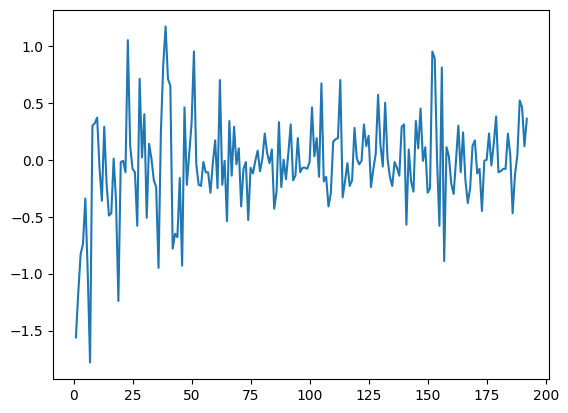

In [10]:
import matplotlib.pyplot as plt

y1 = y.collect()
y2 = np.diff(y1)

plt.plot(x, y2)
plt.show()